In [2]:
from hatespeech import HateSpeechClassifier
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
csf = HateSpeechClassifier()
X, y = csf.build()
tweets = csf.df.tweet
feats_names = csf.feature_names

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07f881f9b0>]],
      dtype=object)

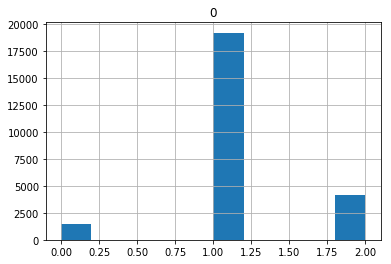

In [4]:
pd.DataFrame(y).hist()

In [5]:
X.shape, len(feats_names)

((24783, 11145), 11145)

In [6]:
data = pd.DataFrame(X, columns=feats_names)
data['class'] = y
data.describe()

ab          abil           abl           abo         abort  \
count  24783.000000  24783.000000  24783.000000  24783.000000  24783.000000   
mean       0.002918      0.002258      0.003240      0.007125      0.002961   
std        0.162368      0.145097      0.169970      0.239054      0.184221   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        9.038472      9.326154      8.920689      8.026871     18.344006   

               abov       absolut           abt           abu          abus  \
count  24783.000000  24783.000000  24783.000000  24783.000000  24783.000000   
mean       0.004180      0.008522      0.003600      0.002302      0.003870   
std        0.189924      0.258047      0.196267      0.170824      0.183675   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.633007      7.822076     17.841377     19.016951      8.720018   

           ...          num_words  num_unique_words     vader neg  \
count      ...       24783.000000      24783.000000  24783.000000   
mean       ...          13.592947         12.913933      0.228975   
std        ...           6.885442          6.281764      0.205714   
min        ...           1.000000          1.000000      0.000000   
25%        ...           8.000000          8.000000      0.000000   
50%        ...          13.000000         12.000000      0.219000   
75%        ...          19.000000         18.000000      0.368000   
max        ...          36.000000         33.000000      1.000000   

          vader pos     vader neu  vader compound  num_hashtags  num_mentions  \
count  24783.000000  24783.000000    24783.000000  24783.000000  24783.000000   
mean       0.094317      0.676709       -0.259380      0.778961      0.778195   
std        0.129019      0.214635        0.480408      2.006578      0.875600   
min        0.000000      0.000000       -0.992400      0.000000      0.000000   
25%        0.000000      0.526000       -0.659700      0.000000      0.000000   
50%        0.000000      0.674000       -0.340000      0.000000      1.000000   
75%        0.171000      0.828000        0.000000      1.000000      1.000000   
max        0.859000      1.000000        0.983400     77.000000     10.000000   

           num_urls    is_retweet  
count  24783.000000  24783.000000  
mean       0.124117      0.064924  
std        0.341150      0.246396  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        2.000000      1.000000  

[8 rows x 11145 columns]

In [7]:
data.head()

ab  abil  abl  abo  abort  abov  absolut  abt  abu  abus     ...      \
0  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
1  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
2  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
3  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       
4  0.0   0.0  0.0  0.0    0.0   0.0      0.0  0.0  0.0   0.0     ...       

   num_words  num_unique_words  vader neg  vader pos  vader neu  \
0       25.0              23.0      0.000      0.120      0.880   
1       16.0              16.0      0.237      0.000      0.763   
2       20.0              18.0      0.538      0.000      0.462   
3        8.0               8.0      0.000      0.344      0.656   
4       26.0              23.0      0.109      0.229      0.662   

   vader compound  num_hashtags  num_mentions  num_urls  is_retweet  
0          0.4563           0.0           1.0       0.0         0.0  
1         -0.6876           0.0           1.0       0.0         0.0  
2         -0.9550           0.0           2.0       0.0         1.0  
3          0.5673           0.0           2.0       0.0         0.0  
4          0.6331           1.0           1.0       0.0         0.0  

[5 rows x 11145 columns]

## Teste com modelos

In [1]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

def conf_matrix(matrix):
    matrix_proportions = np.zeros((3, 3))
    for i in range(0, 3):
        matrix_proportions[i, :] = matrix[i, :] / float(matrix[i, :].sum())
            
    return matrix_proportions

X = data.drop(['class'], axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)


NameError: name 'data' is not defined

### LogisticRegression

In [9]:
select_model = SelectFromModel(
    LogisticRegression(class_weight='balanced', penalty='l1', C=0.01)
)
LR = LogisticRegression(class_weight='balanced', penalty='l2')
pipeline = Pipeline(steps=[
    ('select', select_model),
    ('model', LR)
])

In [10]:
param_grid = [{}]

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, random_state=42).split(X_train, y_train),
    verbose=1,
    n_jobs=10,
    return_train_score=True
)

#### encontra o melhor modelo

In [11]:
model = grid_search.fit(X_train, y_train)
y_preds = model.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   55.1s finished


In [12]:
best_pipe = grid_search.best_estimator_
best_pipe.named_steps
pd.DataFrame(grid_search.cv_results_)
grid_search.best_estimator_.get_params()
print(classification_report(y_test, y_preds))

             precision    recall  f1-score   support

          0       0.39      0.59      0.47       129
          1       0.97      0.91      0.94      1903
          2       0.84      0.94      0.88       447

avg / total       0.91      0.90      0.90      2479



In [13]:
def run_tests(df_x, df_y):
    for n in range(10):
        xtrain, xtest, ytrain, ytest = train_test_split(
            df_x, df_y, test_size=0.1
        )
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=StratifiedKFold(n_splits=5, random_state=42).split(xtrain, ytrain),
            n_jobs=10
        )
        model = grid_search.fit(xtrain, ytrain)
        ypreds = model.predict(xtest)

        cm = confusion_matrix(ytest, ypreds)
        r = conf_matrix(cm)
        print(r[0][0], r[1][1], r[2][2])
        
        
for n in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.1
    )
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=StratifiedKFold(n_splits=5, random_state=42).split(X_train, y_train),
        n_jobs=10
    )
    model = grid_search.fit(X_train, y_train)
    y_preds = model.predict(X_test)

    cm = confusion_matrix(y_test, y_preds)
    r = conf_matrix(cm)
    print(r[0][0], r[1][1], r[2][2])

0.6028368794326241 0.9051859612362494 0.9300699300699301
0.6013513513513513 0.902247778358599 0.9425837320574163
0.5874125874125874 0.8935400516795866 0.9326683291770573
0.6444444444444445 0.9056109071840587 0.954233409610984
0.6058394160583942 0.8991640543364682 0.9439252336448598
0.5167785234899329 0.9030239833159541 0.9344660194174758
0.6120689655172413 0.9095092024539877 0.9533169533169533
0.6906474820143885 0.898043254376931 0.9346733668341709
0.5570469798657718 0.8930817610062893 0.9407582938388626
0.5285714285714286 0.9043927648578811 0.943069306930693
